In [1]:
#to combine seperate csv files into one
#import glob
#import os
import pandas as pd


#path =r'C:\Users\Lenovo\Desktop\BT4222\Project\data\App_Review'
#allfiles = glob.glob(os.path.join(path, "*.csv"))
#df = pd.concat((pd.read_csv(f) for f in allfiles))
#df.to_csv("reviews.csv", encoding='utf-8', index=False)

path = './reviews.csv'
df = pd.read_csv(path)

In [2]:
df.head()

,App_Title,Date,Rating,Review_Helpful,Review_Text,User_Name
0,Shall we date?WizardessHeart+,"February 26, 2018",3,14,This game is good and the story was interestin...,Nur Aisha
1,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton
2,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman
3,Shall we date?WizardessHeart+,"March 26, 2018",1,1,I've commented before about this but I despera...,elysian
4,Shall we date?WizardessHeart+,"February 26, 2018",3,14,This game is good and the story was interestin...,Nur Aisha


In [3]:
df.shape

(363129, 6)

In [4]:
df.columns = ['title', 'date','rating','helpful','text','username']

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['text'] = df['text'].astype(str)

In [7]:
df['length'] = df.text.apply(len)

In [8]:
df.dtypes

title               object
date        datetime64[ns]
rating               int64
helpful              int64
text                object
username            object
length               int64
dtype: object

In [9]:
df.head()

,title,date,rating,helpful,text,username,length
0,Shall we date?WizardessHeart+,2018-02-26,3,14,This game is good and the story was interestin...,Nur Aisha,634
1,Shall we date?WizardessHeart+,2018-03-22,2,11,Rather then an actual chapter as in some other...,Jessica Claxton,701
2,Shall we date?WizardessHeart+,2018-03-16,5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman,261
3,Shall we date?WizardessHeart+,2018-03-26,1,1,I've commented before about this but I despera...,elysian,574
4,Shall we date?WizardessHeart+,2018-02-26,3,14,This game is good and the story was interestin...,Nur Aisha,634


In [10]:
df.title.nunique()

53

In [11]:
df.rating.value_counts()/df.rating.shape

5    0.688304
4    0.136010
1    0.080737
3    0.067728
2    0.027222
Name: rating, dtype: float64

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


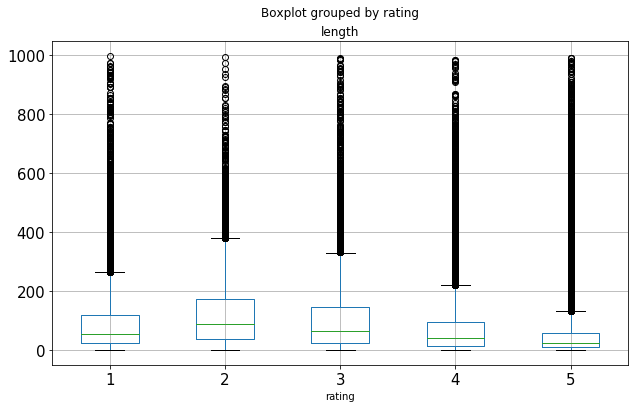

In [12]:
# box plot of length for rating 
%matplotlib inline
df[(df.length<1000)].boxplot('length', by='rating', rot=0, figsize=(10,6),fontsize = 15)

### We can see that reviews with 2, 3, 4 stars generally has higher length than 1 and 5 star reviews

# Check the overall trend of ratings over years

In [13]:
df["year"]=df.date.map(lambda x: x.strftime('%Y'))

In [14]:
df["month"]=df.date.map(lambda x: x.strftime('%Y-%m'))

In [15]:
df.head()

,title,date,rating,helpful,text,username,length,year,month
0,Shall we date?WizardessHeart+,2018-02-26,3,14,This game is good and the story was interestin...,Nur Aisha,634,2018,2018-02
1,Shall we date?WizardessHeart+,2018-03-22,2,11,Rather then an actual chapter as in some other...,Jessica Claxton,701,2018,2018-03
2,Shall we date?WizardessHeart+,2018-03-16,5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman,261,2018,2018-03
3,Shall we date?WizardessHeart+,2018-03-26,1,1,I've commented before about this but I despera...,elysian,574,2018,2018-03
4,Shall we date?WizardessHeart+,2018-02-26,3,14,This game is good and the story was interestin...,Nur Aisha,634,2018,2018-02


In [16]:
df1=pd.DataFrame({'avg_rating': df.groupby( ["year", "title"] )['rating'].mean()}).reset_index()

In [17]:
df1.head()

,year,title,avg_rating
0,2012,Zombie Dash,4.487597
1,2013,Eyes - The Horror Game,4.638225
2,2013,Treasure Diving,4.443336
3,2013,Zombie Dash,4.374144
4,2014,Adventure Town,4.494424


In [18]:
df2=df1.set_index(["title","year"]).unstack(level=0)

In [19]:
df2.shape

(7, 53)

In [20]:
df2

avg_rating                                                     \
title Adventure Town Alice in the Mirrors of Albion   BADLAND BADLAND 2   
year                                                                      
2012             NaN                            NaN       NaN       NaN   
2013             NaN                            NaN       NaN       NaN   
2014        4.494424                            NaN       NaN       NaN   
2015        4.331569                            NaN       NaN       NaN   
2016        4.441871                       3.944687  4.105445  3.555397   
2017        4.603757                       4.317216  4.316101  3.958348   
2018        4.608491                       4.632184  4.161194  3.946067   

                                                                          \
title Benji Bananas Castle Cats Epic Story Quests Clumsy Ninja  Crab War   
year                                                                       
2012            NaN                           NaN          NaN       NaN   
2013            NaN                           NaN          NaN       NaN   
2014       4.452807                           NaN          NaN       NaN   
2015       4.344253                           NaN          NaN       NaN   
2016       4.256757                           NaN          NaN       NaN   
2017       4.585549                      4.757277     4.253436  4.652246   
2018       4.675949                      4.773532     4.134431  4.691595   

                                     ...                                \
title Crazy Wheels Criminal Case     ...     Sonic Forces Speed Battle   
year                                 ...                                 
2012           NaN           NaN     ...                           NaN   
2013           NaN           NaN     ...                           NaN   
2014           NaN           NaN     ...                           NaN   
2015      3.791940           NaN     ...                           NaN   
2016      3.911640           NaN     ...                           NaN   
2017      4.171171      4.596650     ...                      4.392145   
2018      3.978102      4.680774     ...                      4.581487   

                                              \
title Stranger Things The Game Street Chaser   
year                                           
2012                       NaN           NaN   
2013                       NaN           NaN   
2014                       NaN           NaN   
2015                       NaN           NaN   
2016                       NaN           NaN   
2017                  4.739813      4.485294   
2018                  4.779794      4.531884   

                                                                 \
title Survival Island Evolve – Survivor building home  Swordigo   
year                                                              
2012                                              NaN       NaN   
2013                                              NaN       NaN   
2014                                              NaN       NaN   
2015                                              NaN  4.621403   
2016                                         2.968557  4.670481   
2017                                         3.455395  4.730631   
2018                                         3.750588  4.697131   

                                                                          \
title The Walking Dead Season One Tiny Miner Treasure Diving Wolf Online   
year                                                                       
2012                          NaN        NaN             NaN         NaN   
2013                          NaN        NaN        4.443336         NaN   
2014                     3.675676        NaN        4.434152         NaN   
2015                     3.686717        NaN        4.422427    3.506832   
2016                     4.050107        NaN        4.513174    3.804000 

In [21]:
df3=pd.DataFrame({'avg_rating': df.groupby( ["month", "title"] )['rating'].mean()}).reset_index()
df4=df3.set_index(["title","month"]).unstack(level=0)
df4.head()

avg_rating                                                   \
title   Adventure Town Alice in the Mirrors of Albion BADLAND BADLAND 2   
month                                                                     
2012-07            NaN                            NaN     NaN       NaN   
2012-08            NaN                            NaN     NaN       NaN   
2012-09            NaN                            NaN     NaN       NaN   
2012-10            NaN                            NaN     NaN       NaN   
2012-11            NaN                            NaN     NaN       NaN   

                                                                           \
title   Benji Bananas Castle Cats Epic Story Quests Clumsy Ninja Crab War   
month                                                                       
2012-07           NaN                           NaN          NaN      NaN   
2012-08           NaN                           NaN          NaN      NaN   
2012-09           NaN                           NaN          NaN      NaN   
2012-10           NaN                           NaN          NaN      NaN   
2012-11           NaN                           NaN          NaN      NaN   

                                       ...                                \
title   Crazy Wheels Criminal Case     ...     Sonic Forces Speed Battle   
month                                  ...                                 
2012-07          NaN           NaN     ...                           NaN   
2012-08          NaN           NaN     ...                           NaN   
2012-09          NaN           NaN     ...                           NaN   
2012-10          NaN           NaN     ...                           NaN   
2012-11          NaN           NaN     ...                           NaN   

                                                \
title   Stranger Things The Game Street Chaser   
month                                            
2012-07                      NaN           NaN   
2012-08                      NaN           NaN   
2012-09                      NaN           NaN   
2012-10                      NaN           NaN   
2012-11                      NaN           NaN   

                                                                  \
title   Survival Island Evolve – Survivor building home Swordigo   
month                                                              
2012-07                                             NaN      NaN   
2012-08                                             NaN      NaN   
2012-09                                             NaN      NaN   
2012-10                                             NaN      NaN   
2012-11                                             NaN      NaN   

                                                                            \
title   The Walking Dead Season One Tiny Miner Treasure Diving Wolf Online   
month                                                                        
2012-07                         NaN        NaN             NaN         NaN   
2012-08                         NaN        NaN             NaN         NaN   
2012-09                         NaN        NaN             NaN         NaN   
2012-10                         NaN        NaN             NaN         NaN   
2012-11                         NaN        NaN             NaN         NaN   

                     
title   Zombie Dash  
month                
2012-07    4.487437  
2012-08    4.540201  
2012-09    4.527094  
2012-10    4.566667  
2012-11    4.348936  

[5 rows x 53 columns]

In [22]:
list(df2.columns)

[('avg_rating', 'Adventure Town'),
 ('avg_rating', 'Alice in the Mirrors of Albion'),
 ('avg_rating', 'BADLAND'),
 ('avg_rating', 'BADLAND 2'),
 ('avg_rating', 'Benji Bananas'),
 ('avg_rating', 'Castle Cats Epic Story Quests'),
 ('avg_rating', 'Clumsy Ninja'),
 ('avg_rating', 'Crab War'),
 ('avg_rating', 'Crazy Wheels'),
 ('avg_rating', 'Criminal Case'),
 ('avg_rating', 'Criminal Case Pacific Bay'),
 ('avg_rating', 'Criminal Case Save the World!'),
 ('avg_rating', "Diggy's Adventure"),
 ('avg_rating', 'Dragon Land'),
 ('avg_rating', 'Draw Your Game'),
 ('avg_rating', 'Draw a Stickman EPIC 2 Free'),
 ('avg_rating', 'Eyes - The Horror Game'),
 ('avg_rating', 'Fast like a Fox'),
 ('avg_rating', 'Flutter Butterfly Sanctuary'),
 ('avg_rating', 'Freeroam City Online'),
 ('avg_rating', 'Ghost Town Adventures Mystery Riddles Game'),
 ('avg_rating', 'Growtopia'),
 ('avg_rating', 'Hidden City Hidden Object Adventure'),
 ('avg_rating', 'Hollywood Story'),
 ('avg_rating', 'Ice Age Adventures'),
 (

In [23]:
df2['year'] = df2.index

In [24]:
df4['month']=df4.index

In [25]:
df4.dtypes

            title                                          
avg_rating  Adventure Town                                     float64
            Alice in the Mirrors of Albion                     float64
            BADLAND                                            float64
            BADLAND 2                                          float64
            Benji Bananas                                      float64
            Castle Cats Epic Story Quests                      float64
            Clumsy Ninja                                       float64
            Crab War                                           float64
            Crazy Wheels                                       float64
            Criminal Case                                      float64
            Criminal Case Pacific Bay                          float64
            Criminal Case Save the World!                      float64
            Diggy's Adventure                                  float64
            Drago

In [26]:
df4.head()

avg_rating                                                   \
title   Adventure Town Alice in the Mirrors of Albion BADLAND BADLAND 2   
month                                                                     
2012-07            NaN                            NaN     NaN       NaN   
2012-08            NaN                            NaN     NaN       NaN   
2012-09            NaN                            NaN     NaN       NaN   
2012-10            NaN                            NaN     NaN       NaN   
2012-11            NaN                            NaN     NaN       NaN   

                                                                           \
title   Benji Bananas Castle Cats Epic Story Quests Clumsy Ninja Crab War   
month                                                                       
2012-07           NaN                           NaN          NaN      NaN   
2012-08           NaN                           NaN          NaN      NaN   
2012-09           NaN                           NaN          NaN      NaN   
2012-10           NaN                           NaN          NaN      NaN   
2012-11           NaN                           NaN          NaN      NaN   

                                     ...                              \
title   Crazy Wheels Criminal Case   ...    Stranger Things The Game   
month                                ...                               
2012-07          NaN           NaN   ...                         NaN   
2012-08          NaN           NaN   ...                         NaN   
2012-09          NaN           NaN   ...                         NaN   
2012-10          NaN           NaN   ...                         NaN   
2012-11          NaN           NaN   ...                         NaN   

                                                                       \
title   Street Chaser Survival Island Evolve – Survivor building home   
month                                                                   
2012-07           NaN                                             NaN   
2012-08           NaN                                             NaN   
2012-09           NaN                                             NaN   
2012-10           NaN                                             NaN   
2012-11           NaN                                             NaN   

                                                                         \
title   Swordigo The Walking Dead Season One Tiny Miner Treasure Diving   
month                                                                     
2012-07      NaN                         NaN        NaN             NaN   
2012-08      NaN                         NaN        NaN             NaN   
2012-09      NaN                         NaN        NaN             NaN   
2012-10      NaN                         NaN        NaN             NaN   
2012-11      NaN                         NaN        NaN             NaN   

                                   month  
title   Wolf Online Zombie Dash           
month                                     
2012-07         NaN    4.487437  2012-07  
2012-08         NaN    4.540201  2012-08  
2012-09         NaN    4.527094  2012-09  
2012-10         NaN    4.566667  2012-10  
2012-11         NaN    4.348936  2012-11  

[5 rows x 54 columns]

In [27]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

f, axs = plt.subplots(18,3,figsize=(20,70))

# multiple line plot
num=0
for column in df2.drop('year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(18, 3, num)
     
    # Plot the lineplot
    plt.plot(df2['year'], df2[(column)], marker='', color=palette(1), linewidth=1.9, alpha=0.9, label=(column))
    plt.xlim(2012,2018)
    plt.ylim(1,5)
  
    # general title
    plt.suptitle("Trend of yearly average rating", fontsize=25, fontweight=0, color='black', style='italic', y=0.89)
 
    # Axis title
    plt.text(3,0.5, column, ha='center', va='center',fontsize=15)
    


Text(57,2.5,'Fast like a Fox')

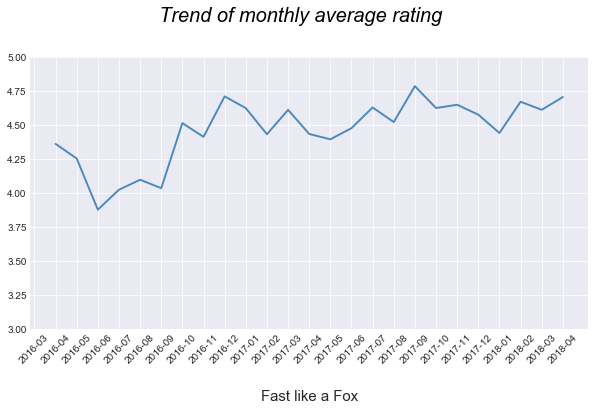

In [217]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

plt.figure(figsize=(10,5))
     
# Plot the lineplot
plt.plot(df4['month'], df4[('avg_rating', 'Fast like a Fox')], marker='', color=palette(1), linewidth=1.9, alpha=0.9, label=('avg_rating', 'Fast like a Fox'))
plt.ylim(3,5)
plt.xticks(rotation=45)
  
# general title
plt.suptitle("Trend of monthly average rating", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(57, 2.5, 'Fast like a Fox', ha='center', va='center',fontsize=15)

# Compare the 2-4 star reviews and 1&5 star reviews

In [28]:
# create two new DataFrame that only contains the 2-4 ratings review and 1&5 ratings review seperately
review_onefive = df[(df.rating==5) | (df.rating==1)]
review_onefive.shape

(279261, 9)

In [29]:
review_onefive["length"].mean()

54.91781165289819

In [30]:
review_twofour = df[(df.rating==2) | (df.rating==3)| (df.rating==4)]
review_twofour.shape

(83868, 9)

In [31]:
review_twofour["length"].mean()

93.06430342919826

In [32]:
x15=review_onefive.text

In [33]:
x15.head()

2    I loved it , it is so addicting and the charac...
3    I've commented before about this but I despera...
6    I loved it , it is so addicting and the charac...
7    I've commented before about this but I despera...
8    This is my favorite app and has been for almos...
Name: text, dtype: object

In [34]:
x24=review_twofour.text

In [35]:
x24.head()

0    This game is good and the story was interestin...
1    Rather then an actual chapter as in some other...
4    This game is good and the story was interestin...
5    Rather then an actual chapter as in some other...
9    This used to be my favorite Solmare game, but ...
Name: text, dtype: object

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=10,ngram_range=(1, 2), stop_words='english')
#from sklearn.feature_extraction.text import CountVectorizer
#vect = CountVectorizer(max_features=5000,stop_words='english')

vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [106]:
dtm24 = vect.fit_transform(x24)
dtm24.shape

(83868, 9797)

In [107]:
dtm24

<83868x9797 sparse matrix of type '<class 'numpy.float64'>'
	with 778895 stored elements in Compressed Sparse Row format>

In [108]:
features = vect.get_feature_names()
len(features)

9797

## Top weighted 100 words in 2-4 stars reviews

In [109]:
import numpy as np
indices = np.argsort(vect.idf_)[::-1]
top_n24 = 100
top_features24 = [features[i] for i in indices[:top_n24]]
print(top_features24)

['items complete', 'interesting like', 'points time', 'thought going', 'cool buy', 'points fix', 'thrill', 'installing game', 'instruction', 'intended', 'convert', 'throws', 'ths', 'plz try', 'interested game', 'plz solve', 'tick', 'thou', 'pokeball', 'thirty', 'imposible', 'cost items', 'im sorry', 'cost coins', 'corrected', 'im uninstalling', 'pop middle', 'think love', 'thinking deleting', 'poor graphics', 'impossible finish', 'cool thing', 'think time', 'includes', 'think way', 'interesting good', 'controls pretty', 'completed episode', 'controls make', 'item need', 'playing little', 'connection failed', 'items energy', 'items hard', 'items way', 'connect friends', 'j7', 'jack', 'jesse', 'time opened', 'concerns', 'job guys', 'completed offer', 'time player', 'connection server', 'issues fixed', 'playing stop', 'time come', 'pls reply', 'controls difficult', 'time ad', 'pls im', 'invited', 'time app', 'time did', 'console game', 'time doesn', 'time dont', 'time enter', 'isn really'

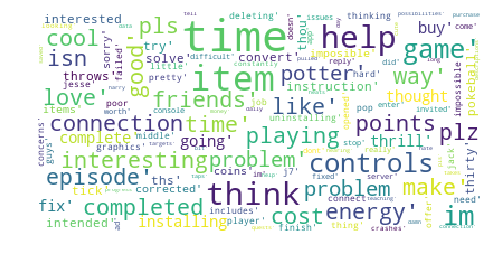

In [110]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = top_features24

wordcloud = WordCloud(
                          background_color='white',
                          #stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Least weighted 100 words in 2-4 stars reviews

In [111]:
indices = np.argsort(vect.idf_)[::1]
btm_n24 = 100
btm_features24 = [features[i] for i in indices[:btm_n24]]
print(btm_features24)

['game', 'good', 'like', 'fun', 'play', 'time', 'love', 'just', 'great', 'really', 'nice', 'fix', 'good game', 'make', 'don', 'playing', 'love game', 'need', 'graphics', 'new', 'update', 'stars', 'great game', 'games', 'ok', 'way', 'level', 'money', 'better', 'hard', 'cool', 'energy', 'want', 'ads', 'like game', 'think', 'free', 'awesome', 'long', 'add', 'buy', 'problem', 'nice game', 'lot', 'got', 'little', 'addictive', 'wish', 'far', 'takes', 'bad', 'app', 'story', 'thing', 'pretty', 'work', 'fun game', 'keeps', 'things', 've', 'bit', 'phone', 'start', 'help', 'know', 'people', 'levels', 'won', 'let', 'played', 'use', 'pay', 'needs', 'try', 'easy', 'doesn', 'screen', 'best', 'getting', 'times', 'enjoy', 'able', 'wait', 'cute', 'open', 'boring', 'having', 'didn', 'controls', 'plz', 'game play', 'amazing', 'annoying', 'episode', 'friends', 'going', 'star', 'play game', 'episodes', 'll']


In [112]:
dtm15 = vect.fit_transform(x15)
dtm15.shape

(279261, 17223)

In [113]:
features = vect.get_feature_names()
len(features)

17223

## Top weighted 100 words in 1&5 stars review

In [114]:
import numpy as np
indices = np.argsort(vect.idf_)[::-1]
top_n15 = 100
top_features15 = [features[i] for i in indices[:top_n15]]
print(top_features15)

['just gave', 'radar', 'flowing', 'struggling', 'unacceptable', 'mincraft story', 'pegi', 'fluent', 'peice', 'love fight', 'connection issues', 'quits', 'easy eyes', 'easy easy', 'connection says', 'love fame', 'understood', 'unexpectedly', 'unfortunate', 'nostalgic game', 'strategies', 'mind occupied', 'stranger thing', 'mind paying', 'awfully', 'stuck chapter', 'going different', 'j5', 'umbras', 'payments', 'flappy bird', 'bad actually', 'isn opening', 'easy kill', 'game sucked', 'going best', 'stuff fun', 'love girl', 'love ghost', 'easy interesting', 'issue resolved', 'babys', 'baby girl', 'issue ve', 'happen game', 'middle playing', 'aye', 'ultimate game', 'ultimately', 'mighty', 'mild', 'uma', 'fooled', 'quicker love', 'good balance', 'quality games', 'storyline best', 'minecraft good', 'ji', 'easier level', 'easier gems', 'jj', 'forgetting', 'people doing', 'easier earn', 'earthbound', 'story time', 'update best', 'pvp game', 'update bit', 'forgive', 'update change', 'content ga

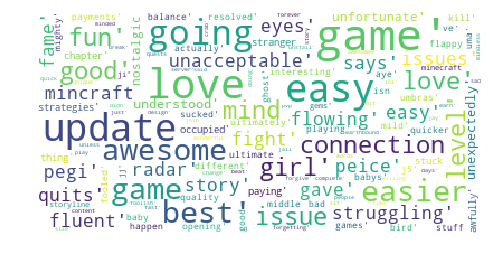

In [115]:
mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data1 = top_features15

wordcloud = WordCloud(
                          background_color='white',
                          #stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data1))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## least weighted 100 words in 1&5 stars reviews

In [116]:
indices = np.argsort(vect.idf_)[::1]
btm_n15 = 50
btm_features15 = [features[i] for i in indices[:top_n15]]
print(top_features15)

['just gave', 'radar', 'flowing', 'struggling', 'unacceptable', 'mincraft story', 'pegi', 'fluent', 'peice', 'love fight', 'connection issues', 'quits', 'easy eyes', 'easy easy', 'connection says', 'love fame', 'understood', 'unexpectedly', 'unfortunate', 'nostalgic game', 'strategies', 'mind occupied', 'stranger thing', 'mind paying', 'awfully', 'stuck chapter', 'going different', 'j5', 'umbras', 'payments', 'flappy bird', 'bad actually', 'isn opening', 'easy kill', 'game sucked', 'going best', 'stuff fun', 'love girl', 'love ghost', 'easy interesting', 'issue resolved', 'babys', 'baby girl', 'issue ve', 'happen game', 'middle playing', 'aye', 'ultimate game', 'ultimately', 'mighty', 'mild', 'uma', 'fooled', 'quicker love', 'good balance', 'quality games', 'storyline best', 'minecraft good', 'ji', 'easier level', 'easier gems', 'jj', 'forgetting', 'people doing', 'easier earn', 'earthbound', 'story time', 'update best', 'pvp game', 'update bit', 'forgive', 'update change', 'content ga